In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data required for the algoritham

In [3]:
data = pd.read_csv('cell_samples.csv')

In [4]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
data.shape

(699, 11)

In [7]:
data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [8]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [9]:
# Distrubution of the classes

In [10]:
benign_df = data[data['Class']==2][0:200]
malignant_df = data[data['Class']==4][0:200]

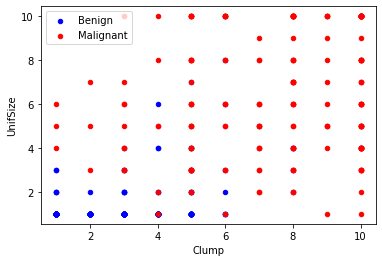

In [15]:
axes = benign_df.plot(kind = 'scatter' , x='Clump',y='UnifSize', color = 'blue',label = 'Benign')
malignant_df.plot(kind = 'scatter', x='Clump',y='UnifSize', color = 'red',label = 'Malignant', ax = axes)
plt.show()


## IDENTIFYING THE UNWANTED ROWS

In [16]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [20]:
data = data[pd.to_numeric(data['BareNuc'],errors ='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int')
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Remove unwanted columns

In [29]:
data.columns
feature_df = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
target_df = data['Class']
x=np.asarray(feature_df)
y = np.asarray(target_df)

In [31]:
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [32]:
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [33]:
x.shape

(683, 9)

In [36]:
from  sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 4)

In [39]:
x_train.shape

(546, 9)

In [40]:
y_train.shape

(546,)

In [41]:
x_test.shape

(137, 9)

In [42]:
y_test.shape

(137,)

In [45]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear',gamma = 'auto',C=2)
classifier.fit(x_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [47]:
y_predict = classifier.predict(x_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

